# Food and Nutrition
-----------------------------------------------


# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

In [4]:
df
df.shape


(7083, 38)

In [5]:
nutrients = [i for i in df.columns if i.startswith('Data') ]
len(nutrients)

35

There are total 35 different nutrients in the data

# Random Sampling
Take a random sample.

In [6]:
from sklearn.utils import shuffle
df_fn = shuffle(df,random_state=17)
df_fn = df.sample(frac=0.9, replace=False, weights=None, random_state=17, axis=None, ignore_index=False)

In [7]:
df_fn.shape

(6375, 38)

# Missing Values

In [8]:
df_fn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 928 to 6266
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                     

In [9]:
df_fn.isna().sum(axis = 0)

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Beta Carotene                0
Data.Beta Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein and Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monosaturated Fat        0
Data.Fat.Polysaturated Fat        0
Data.Fat.Saturated Fat            0
Data.Fat.Total Lipid              0
Data.Major Minerals.Calcium       0
Data.Major Minerals.Copper        0
Data.Major Minerals.Iron          0
Data.Major Minerals.Magnesiu

# Analysis of the missing values

<AxesSubplot:xlabel='column_name'>

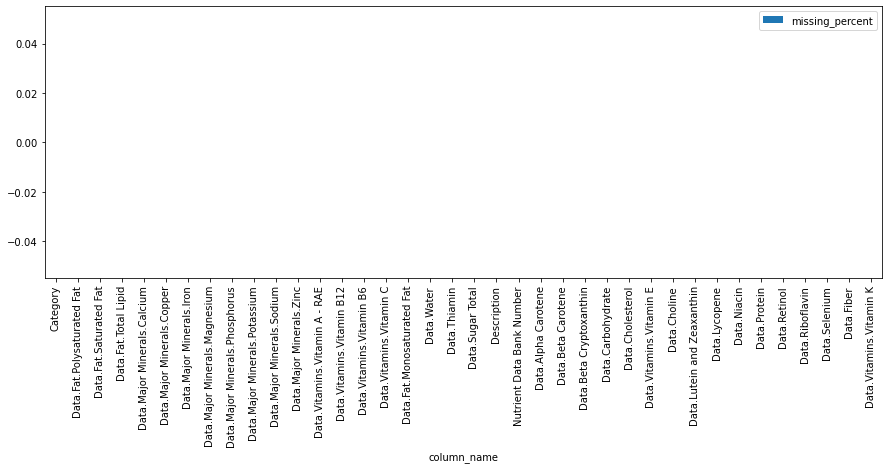

In [10]:
missing_percent = df_fn.isnull().sum() * 100 / len(df_fn)
missing_value = pd.DataFrame({'column_name': df_fn.columns,
                                 'missing_percent': missing_percent})

missing_value.sort_values("missing_percent").plot(kind='bar',x='column_name',y='missing_percent',figsize=(15, 5))

# Literature Review and Basic



## Lit review (10 pts)
There is wonderful information on each of the nutrients here:
* https://corgis-edu.github.io/corgis/csv/food/

Tell a story about different food products and their cholesterol values - what do they have in common? What foods are high in cholesterol? Which nutrients are most correlated with cholesterol? Back your analysis up with at least 10 citations - cite them inline [1] and also as a list below so we know where you got the source.


In [11]:
high = df_fn['Data.Cholesterol'].max()
highest_row = df_fn[df_fn["Data.Cholesterol"] == high]

low = df_fn['Data.Cholesterol'].min()
lowest_row = df_fn[df_fn["Data.Cholesterol"] == low]


print("The food categories {0} are having highest Cholesterol values: {1}".format(highest_row["Category"].to_list(), highest_row["Data.Cholesterol"].to_list()[0]))
print("The food categories {0} are having lowest Cholesterol values: {1}".format(lowest_row["Category"].to_list(), lowest_row["Data.Cholesterol"].to_list()[0]))

The food categories ['Brains'] are having highest Cholesterol values: 3074
The food categories ['Cereal (General Mills Cheerios Protein)', 'Cookie', 'Turnip greens', 'Fruit', 'Pie', 'Plantain', 'Energy drink (SoBe Energize Energy Juice Drink)', 'Black beans', 'Bread', 'Cereal (General Mills Chex Rice)', 'Black beans', 'Margarine', 'Roll', 'Peanut butter sandwich', 'Guava nectar', 'Soft drink', 'Rice cereal with bananas', 'Almonds', 'Industrial oil as ingredient in food', 'Summer squash', 'Apple-sweet potato juice', 'Prunes with oatmeal', 'Wine', 'Potato', 'Coconut', 'Oatmeal', 'Cereal (General Mills Fiber One)', 'Pear', 'Frankfurter or hot dog', 'Potato salad', 'Oat bran', 'Cabbage', 'Rum and cola', 'Celery', 'Tom Collins', 'Tangerine', 'Peach', 'Potato chips', 'Classic mixed vegetables', 'Green beans', 'Italian dressing', 'Fruit flavored drink', 'Green peas', 'Roll', 'Papaya', 'Infant formula', 'Snack cake', 'Cookie', "Cereal (Kellogg's Special K Red Berries)", 'Chives', 'Infant formu

#####  Is there any relation between Cholesterol values and other nutrients:

In [12]:
sample = df_fn[df_fn.columns.to_list()[3:]].corr().loc[['Data.Cholesterol']]
sample = sample.drop(['Data.Cholesterol'], axis=1)
print("There is direct relation between the Cholesterol and {0}".format(sample.idxmax(axis=1).to_list()[0]))

There is direct relation between the Cholesterol and Data.Choline


<AxesSubplot:xlabel='Data.Cholesterol'>

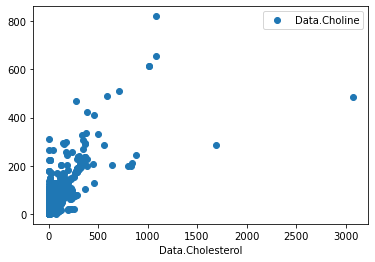

In [13]:
df_fn.plot(x='Data.Cholesterol', y='Data.Choline', style='o')

 - If cholestrol value increases then choline value is also increasing 90% of the times

In [14]:
# 3) lets look a the low cholestrol foods and findout any similarities:
lowest_row.Category.unique()

array(['Cereal (General Mills Cheerios Protein)', 'Cookie',
       'Turnip greens', 'Fruit', 'Pie', 'Plantain',
       'Energy drink (SoBe Energize Energy Juice Drink)', 'Black beans',
       'Bread', 'Cereal (General Mills Chex Rice)', 'Margarine', 'Roll',
       'Peanut butter sandwich', 'Guava nectar', 'Soft drink',
       'Rice cereal with bananas', 'Almonds',
       'Industrial oil as ingredient in food', 'Summer squash',
       'Apple-sweet potato juice', 'Prunes with oatmeal', 'Wine',
       'Potato', 'Coconut', 'Oatmeal', 'Cereal (General Mills Fiber One)',
       'Pear', 'Frankfurter or hot dog', 'Potato salad', 'Oat bran',
       'Cabbage', 'Rum and cola', 'Celery', 'Tom Collins', 'Tangerine',
       'Peach', 'Potato chips', 'Classic mixed vegetables', 'Green beans',
       'Italian dressing', 'Fruit flavored drink', 'Green peas', 'Papaya',
       'Infant formula', 'Snack cake',
       "Cereal (Kellogg's Special K Red Berries)", 'Chives', 'Tahini',
       'Margarita mix', 'Wa

 - Low cholsetrol foods includes either green vegetables or fruits or juices or nuts

## Unique values from `Category`

In [15]:
df_fn['Category'].nunique()

2262

In [16]:
x=pd.crosstab(index=df_fn['Category'], columns='Count')
x
x.sort_values('Count', ascending=False)


col_0,Count
Category,
Infant formula,160
Rice,131
Bread,102
Cookie,93
Potato,92
...,...
Fish chowder,1
Fish cake or patty,1
Fish and vegetables excluding carrots,1


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>],
       [<AxesSubplot:title={'center':'22'}>,
        <AxesSub

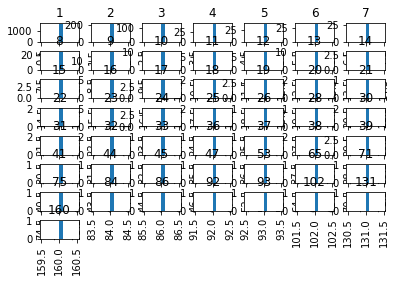

In [17]:
x.hist(by=x['Count'])

## Correlation 

In [18]:
corr = df_fn.corr()
corr

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Nutrient Data Bank Number,1.000000,0.087399,0.171989,0.053455,0.250185,-0.284213,-0.365632,0.169947,0.130504,0.027963,...,-0.341808,-0.081945,-0.239323,-0.140864,0.033104,-0.166285,-0.042181,0.216527,0.055995,0.132138
Data.Alpha Carotene,0.087399,1.000000,0.519548,0.008048,-0.058713,-0.052617,-0.064500,0.032711,0.040924,0.004653,...,-0.095944,0.006896,-0.066148,-0.039837,0.206043,-0.040802,-0.027651,0.041508,-0.008462,0.025433
Data.Beta Carotene,0.171989,0.519548,1.000000,0.032210,-0.086845,-0.075939,-0.088177,0.077220,0.487141,0.006003,...,-0.142784,0.088039,-0.092109,-0.062862,0.349799,-0.057649,-0.014164,0.168578,0.031644,0.460702
Data.Beta Cryptoxanthin,0.053455,0.008048,0.032210,1.000000,0.021349,-0.018523,-0.026261,0.051301,0.041649,0.013500,...,-0.057461,0.024310,-0.043041,-0.027811,0.007314,-0.023259,-0.014858,0.147085,0.001672,0.029002
Data.Carbohydrate,0.250185,-0.058713,-0.086845,0.021349,1.000000,-0.218632,-0.215987,0.481675,-0.075060,-0.056448,...,0.102160,0.116450,0.050760,0.107074,0.054455,-0.012957,0.224627,0.071180,0.101788,-0.091407
Data.Cholesterol,-0.284213,-0.052617,-0.075939,-0.018523,-0.218632,1.000000,0.785274,-0.192788,-0.017347,-0.037707,...,0.270244,0.034960,0.156266,0.082406,0.126555,0.229439,0.034878,-0.105137,0.002069,-0.050297
Data.Choline,-0.365632,-0.064500,-0.088177,-0.026261,-0.215987,0.785274,1.000000,-0.112702,-0.011774,-0.040717,...,0.470571,0.264780,0.217901,0.196673,0.186411,0.367547,0.146911,-0.093768,0.056188,-0.042685
Data.Fiber,0.169947,0.032711,0.077220,0.051301,0.481675,-0.192788,-0.112702,1.000000,0.081453,0.020204,...,0.258568,0.335063,0.017194,0.155471,0.052726,-0.001735,0.288319,0.121219,0.199177,0.055498
Data.Lutein and Zeaxanthin,0.130504,0.040924,0.487141,0.041649,-0.075060,-0.017347,-0.011774,0.081453,1.000000,-0.013691,...,-0.075173,0.083114,-0.056794,-0.019500,0.162965,-0.036469,0.002357,0.180373,0.034960,0.856937
Data.Lycopene,0.027963,0.004653,0.006003,0.013500,-0.056448,-0.037707,-0.040717,0.020204,-0.013691,1.000000,...,-0.051234,0.121837,0.042186,-0.022900,-0.030335,-0.028039,-0.032815,0.043559,-0.003496,-0.016940


<AxesSubplot:>

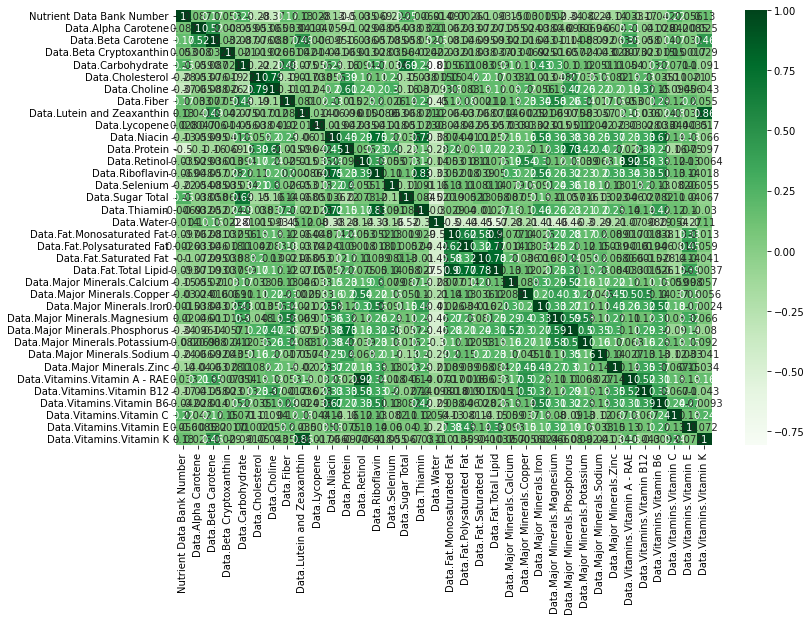

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)

In [20]:
z=df_fn[['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat','Data.Fat.Saturated Fat','Data.Fat.Total Lipid']].corr()


<AxesSubplot:>

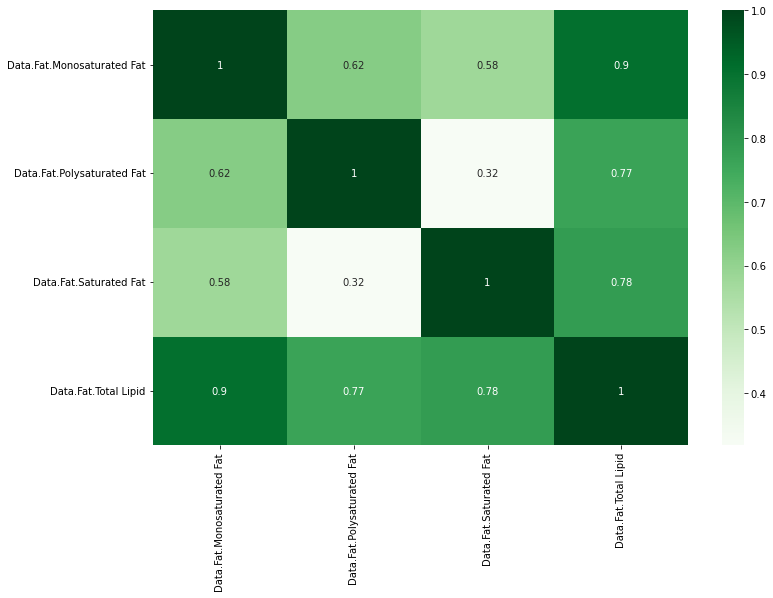

In [21]:
z=df_fn[['Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat','Data.Fat.Saturated Fat','Data.Fat.Total Lipid']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(z, cmap="Greens",annot=True)

In [22]:
z1=df_fn[['Data.Major Minerals.Calcium','Data.Major Minerals.Copper','Data.Major Minerals.Iron','Data.Major Minerals.Magnesium','Data.Major Minerals.Phosphorus','Data.Major Minerals.Potassium','Data.Major Minerals.Sodium','Data.Major Minerals.Zinc']].corr()
z1

,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
Data.Major Minerals.Calcium,1.000000,0.089321,0.298029,0.290881,0.524270,0.160949,0.174116,0.217186
Data.Major Minerals.Copper,0.089321,1.000000,0.195595,0.404542,0.296018,0.265677,0.045150,0.447229
Data.Major Minerals.Iron,0.298029,0.195595,1.000000,0.331914,0.266651,0.169596,0.111879,0.429267
Data.Major Minerals.Magnesium,0.290881,0.404542,0.331914,1.000000,0.588996,0.581308,0.111865,0.271070
Data.Major Minerals.Phosphorus,0.524270,0.296018,0.266651,0.588996,1.000000,0.495992,0.346635,0.303055
Data.Major Minerals.Potassium,0.160949,0.265677,0.169596,0.581308,0.495992,1.000000,0.162991,0.165049
Data.Major Minerals.Sodium,0.174116,0.045150,0.111879,0.111865,0.346635,0.162991,1.000000,0.137227
Data.Major Minerals.Zinc,0.217186,0.447229,0.429267,0.271070,0.303055,0.165049,0.137227,1.000000


<AxesSubplot:>

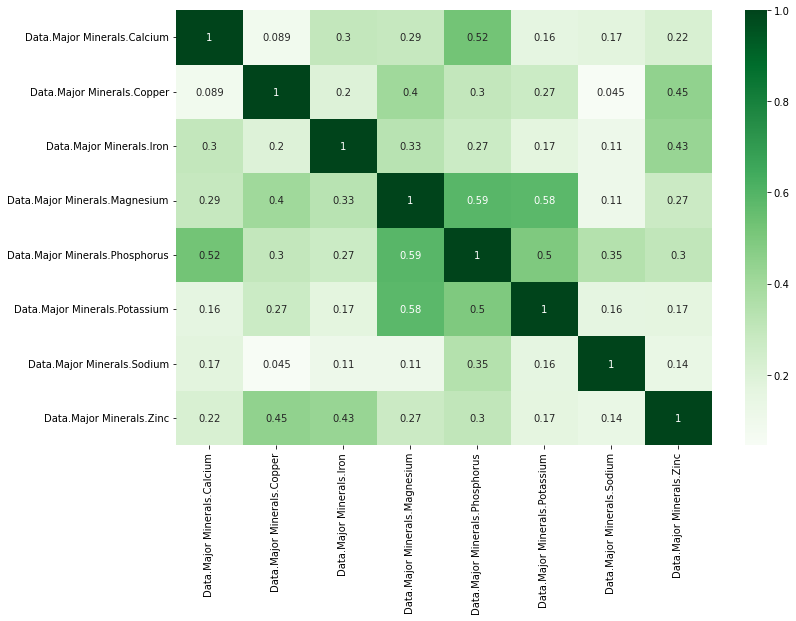

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(z1, cmap="Greens",annot=True)

In [24]:
z2=df_fn[['Data.Vitamins.Vitamin A - RAE','Data.Vitamins.Vitamin B12','Data.Vitamins.Vitamin B6','Data.Vitamins.Vitamin C','Data.Vitamins.Vitamin E','Data.Vitamins.Vitamin K']].corr()
z2

,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
Data.Vitamins.Vitamin A - RAE,1.000000,0.522822,0.305707,0.177577,0.129897,0.161040
Data.Vitamins.Vitamin B12,0.522822,1.000000,0.389758,0.067052,0.102115,-0.042982
Data.Vitamins.Vitamin B6,0.305707,0.389758,1.000000,0.242562,0.265157,-0.009273
Data.Vitamins.Vitamin C,0.177577,0.067052,0.242562,1.000000,0.126148,0.242504
Data.Vitamins.Vitamin E,0.129897,0.102115,0.265157,0.126148,1.000000,0.071513
Data.Vitamins.Vitamin K,0.161040,-0.042982,-0.009273,0.242504,0.071513,1.000000


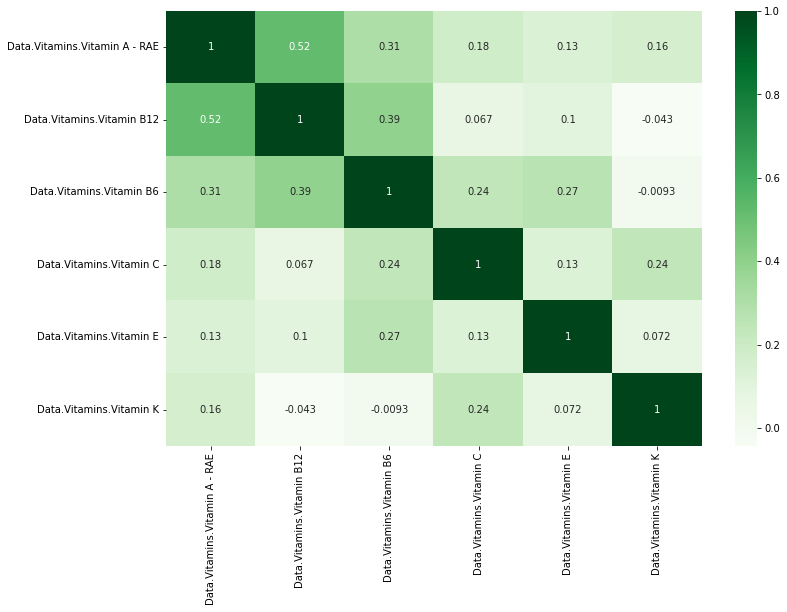

In [199]:
plt.figure(figsize=(12,8))
sns.heatmap(z2, cmap="Greens",annot=True)

In [200]:
z3=df_fn[['Data.Alpha Carotene','Data.Beta Carotene','Data.Beta Cryptoxanthin','Data.Carbohydrate','Data.Cholesterol','Data.Choline','Data.Fiber','Data.Lutein and Zeaxanthin','Data.Lycopene','Data.Niacin','Data.Protein','Data.Retinol','Data.Riboflavin','Data.Selenium','Data.Sugar Total','Data.Thiamin','Data.Water']].corr()
z3

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water
Data.Alpha Carotene,1.000000,0.519548,0.008048,-0.058713,-0.052617,-0.064500,0.032711,0.040924,0.004653,-0.059350,-0.104663,-0.028518,-0.047960,-0.053875,-0.038237,-0.031819,0.113450
Data.Beta Carotene,0.519548,1.000000,0.032210,-0.086845,-0.075939,-0.088177,0.077220,0.487141,0.006003,-0.094888,-0.156564,-0.036040,-0.057045,-0.085340,-0.058100,-0.051557,0.160783
Data.Beta Cryptoxanthin,0.008048,0.032210,1.000000,0.021349,-0.018523,-0.026261,0.051301,0.041649,0.013500,-0.040563,-0.069117,-0.012580,-0.027885,-0.035103,0.063507,-0.024149,0.021545
Data.Carbohydrate,-0.058713,-0.086845,0.021349,1.000000,-0.218632,-0.215987,0.481675,-0.075060,-0.056448,0.252226,-0.163800,0.094115,0.273194,-0.033814,0.690977,0.286025,-0.809678
Data.Cholesterol,-0.052617,-0.075939,-0.018523,-0.218632,1.000000,0.785274,-0.192788,-0.017347,-0.037707,0.056361,0.387762,0.166990,0.113543,0.212677,-0.145854,-0.037847,-0.015030
Data.Choline,-0.064500,-0.088177,-0.026261,-0.215987,0.785274,1.000000,-0.112702,-0.011774,-0.040717,0.195419,0.613980,0.236214,0.202401,0.297150,-0.157579,0.036612,-0.093090
Data.Fiber,0.032711,0.077220,0.051301,0.481675,-0.192788,-0.112702,1.000000,0.081453,0.020204,0.228605,-0.014736,0.024659,0.204062,0.026230,0.135639,0.274670,-0.445350
Data.Lutein and Zeaxanthin,0.040924,0.487141,0.041649,-0.075060,-0.017347,-0.011774,0.081453,1.000000,-0.013691,-0.059532,-0.095558,-0.015325,0.000862,-0.052741,-0.068254,-0.020507,0.121201
Data.Lycopene,0.004653,0.006003,0.013500,-0.056448,-0.037707,-0.040717,0.020204,-0.013691,1.000000,-0.018608,-0.041944,-0.035036,-0.040792,-0.017991,-0.050754,-0.023248,0.080087
Data.Niacin,-0.059350,-0.094888,-0.040563,0.252226,0.056361,0.195419,0.228605,-0.059532,-0.018608,1.000000,0.450323,0.286529,0.751443,0.218906,0.035708,0.716790,-0.378676


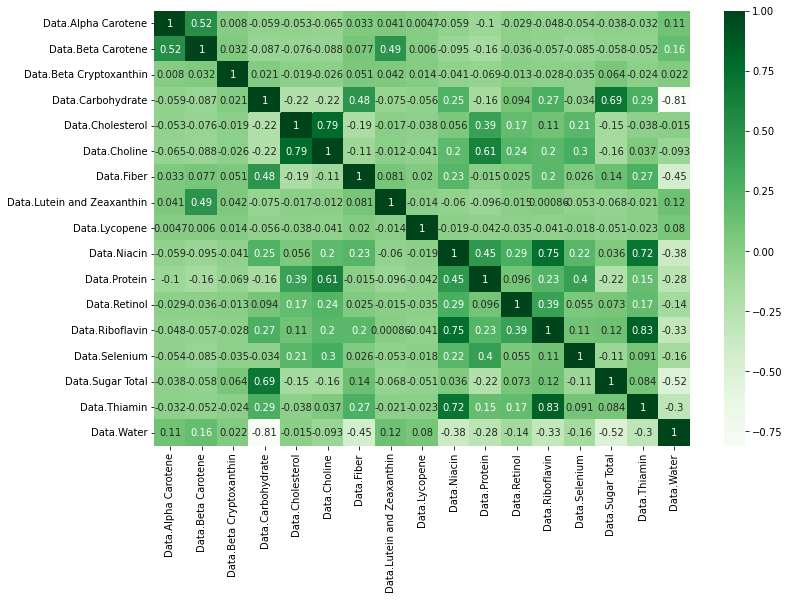

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(z3, cmap="Greens",annot=True)

## Feature Engineering: Net Carbs (5 pts)
Read this article.
* https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps

* Calculate a new feature called `NetCarbs`. (1 pt)
* Is there any relationship between net carbs and cholesterol? Use a plot or table to prove your point. (2 pt)
* Which foods have the lowest net carbs? Which foods have the highest net carbs? What do these foods have in common. (2 pt) 

Support your answer with analysis completed in Python, not just lit review.

In [202]:
df_fn['NetCarbs']=df_fn['Data.Carbohydrate']-df_fn['Data.Fiber']


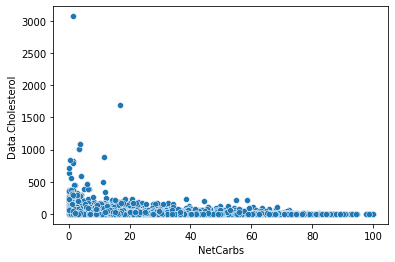

In [203]:

sns.scatterplot(x="NetCarbs", y="Data.Cholesterol", data=df_fn);


In [204]:
z4=df_fn[['NetCarbs','Data.Cholesterol']].corr()
z4

,NetCarbs,Data.Cholesterol
NetCarbs,1.000000,-0.206492
Data.Cholesterol,-0.206492,1.000000


In [205]:

z5=df_fn[['NetCarbs','Description','Category']]

z6=z5.sort_values(by=['NetCarbs'])
z6.head(10)


,NetCarbs,Description,Category
703,0.0,"Ground beef, cooked",Ground beef
1401,0.0,"Ocean perch, steamed or poached",Ocean perch
1093,0.0,"Turkey, light and dark meat, roasted, skin not...",Turkey
970,0.0,"Chicken leg, drumstick and thigh, grilled with...",Chicken leg
6926,0.0,Whiskey and soda,Whiskey and soda
661,0.0,"Beef steak, broiled or baked, lean and fat eaten",Beef steak
795,0.0,"Pork roast, loin, cooked, lean only eaten",Pork roast
660,0.0,"Beef steak, broiled or baked, NS as to fat eaten",Beef steak
658,0.0,"Beef steak, NS as to cooking method, lean and ...",Beef steak
822,0.0,"Pork, neck bones, cooked",Pork


In [206]:
z6.tail(10)

,NetCarbs,Description,Category
6619,98.60,Dietetic or low calorie hard candy,Dietetic or low calorie hard candy
6621,98.60,Dietetic or low calorie mints,Dietetic or low calorie mints
6617,98.60,"Dietetic or low calorie candy, NFS",Dietetic or low calorie candy
6602,98.80,Gumdrops,Gumdrops
372,99.10,"Strawberry beverage powder, dry mix, not recon...",Strawberry beverage powder
6427,99.35,Sugar substitute and sugar blend,Sugar substitute and sugar blend
6423,99.60,"Sugar, white, granulated or lump",Sugar
6424,99.77,"Sugar, white, confectioner's, powdered",Sugar
6431,100.00,"Sugar substitute, monk fruit, powder",Sugar substitute
6429,100.00,"Sugar substitute, stevia, powder",Sugar substitute


# Advanced EDA (10 pts, 2 pts per item)
This is your chance to show-off your data analysis skills. Create a total of five compelling tables and visualizations (2 pts each) to show you understand how to make amazing plots and tables. You should have two or three tables and two or three visualizations.

Each item you create should have a nice sub-header, the figure or table, and then a nice caption which relates back to your theme of cholesterol. Don't just rattle of a bunch of plots for the sake of making plots - do a great job here. You can use your lit review to motivate the creation of these plots and tables.

## Item 1: Scatterplot
Use subheaders to keep your notebook really organized!


**Caption:** this is a caption

## Item 1: Groupby


**Caption:** The item grouped by cholesterol to check which food item has the highest cholesterol.

In [9]:
df_test = df_fn.groupby(['Description','Data.Cholesterol'],as_index = False).mean()

In [10]:
df_test = df_test.sort_values(by='Data.Cholesterol',axis=0,ascending=False)

In [11]:
df_test.head(20)

,Description,Data.Cholesterol,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
470,"Brains, cooked",3074,25150000.0,0.0,69.0,0.0,1.47,486.8,0.0,0.0,...,332.0,242.0,429.0,1.08,6.0,10.02,0.142,10.4,1.66,0.1
580,"Breaded brains, Puerto Rican style",1691,27261000.0,0.0,40.0,1.0,17.35,284.9,0.5,29.0,...,249.0,217.0,318.0,0.94,23.0,5.63,0.114,6.3,2.01,0.4
2385,"Egg, yolk only, raw",1085,31110010.0,38.0,88.0,33.0,3.59,820.2,0.0,1094.0,...,390.0,109.0,48.0,2.30,381.0,1.95,0.350,0.0,2.58,0.7
2384,"Egg, yolk only, cooked, no added fat",1082,31111010.0,38.0,88.0,33.0,3.58,654.2,0.0,1091.0,...,389.0,109.0,164.0,2.29,380.0,1.56,0.332,0.0,2.57,0.7
2382,"Egg, yolk only, cooked, NS as to fat",1015,31111000.0,35.0,93.0,31.0,3.36,612.0,0.0,1020.0,...,364.0,102.0,175.0,2.14,379.0,1.46,0.347,0.0,3.07,5.9
2383,"Egg, yolk only, cooked, fat added",1015,31111020.0,35.0,93.0,31.0,3.36,612.0,0.0,1020.0,...,364.0,102.0,175.0,2.14,379.0,1.46,0.347,0.0,3.07,5.9
5552,"Squid, dried",882,26213170.0,0.0,0.0,0.0,11.65,245.9,0.0,0.0,...,836.0,931.0,899.0,5.79,32.0,4.67,0.201,16.9,4.54,0.0
4882,"Quail egg, canned",841,31203000.0,0.0,11.0,10.0,0.41,210.1,0.0,368.0,...,225.0,132.0,256.0,1.47,156.0,1.26,0.142,0.0,1.08,0.3
2214,"Duck egg, cooked",828,31201000.0,0.0,24.0,11.0,1.36,196.9,0.0,428.0,...,206.0,208.0,266.0,1.32,205.0,4.03,0.258,0.0,1.91,5.6
2840,"Goose egg, cooked",798,31202000.0,0.0,23.0,11.0,1.27,196.9,0.0,412.0,...,194.0,197.0,258.0,1.24,198.0,3.81,0.246,0.0,1.87,5.6


## Item 2: Pivot table


**Caption:** Pivot table is used to find maximum cholesterol, protein, and saturated fat. 

In [12]:
df_pivot = pd.pivot_table(df_fn, values=[ 'Data.Protein', 'Data.Cholesterol', 'Data.Fat.Saturated Fat'], index=['Description'], 
               aggfunc={'Data.Protein':'max', 'Data.Cholesterol': 'max','Data.Fat.Saturated Fat': 'max'}).sort_values(by='Data.Protein',ascending = False)

In [13]:
df_pivot.head(20)

,Data.Cholesterol,Data.Fat.Saturated Fat,Data.Protein
Description,,,
"Nutritional powder mix, protein, NFS",16,0.781,78.13
"Nutritional powder mix, whey based, NFS",16,0.781,78.13
"Tuna, fresh, dried",122,0.538,76.25
Nutritional powder mix (EAS Whey Protein Powder),205,2.564,66.67
"Salmon, dried",144,2.531,64.06
"Fish, NS as to type, dried",152,0.462,62.82
Pork skin rinds,95,11.370,61.30
"Squid, dried",882,1.354,58.94
Nutritional powder mix (Isopure),12,0.581,58.14


## Item 3: Bar plot


**Caption:** Bar plot shows the relationship between categories and the amount of cholesterol each category contains.

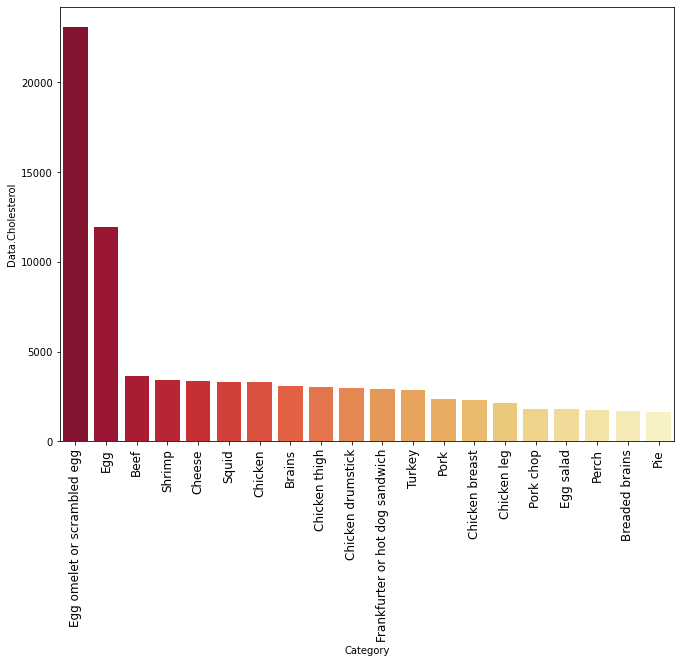

In [14]:
fig=plt.figure(figsize=(11,8))

plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Data.Cholesterol', x='Category', data=df_fn.groupby(['Category'])['Data.Cholesterol'].sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(df_fn.groupby(['Category'])['Data.Cholesterol'].sum().sort_values(ascending=False).reset_index().head(20)['Category']));

## Item 4: Bar plot


**Caption:** Bar plot shows the relationship between amount of protien each category contains and the amount of cholesterol in that category.

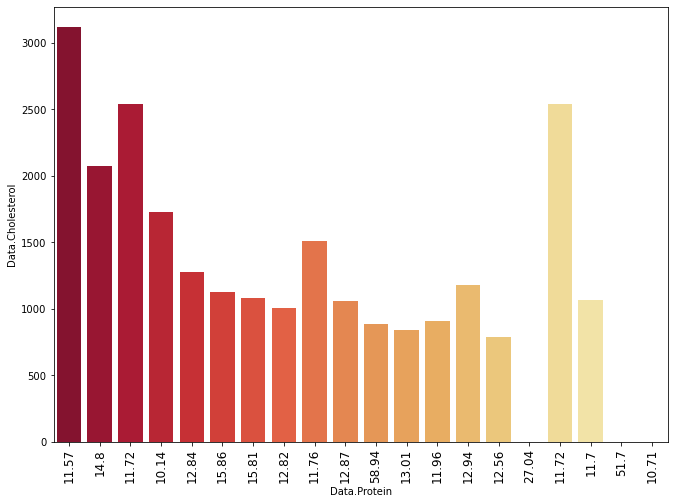

In [15]:
fig=plt.figure(figsize=(11,8))

plt.xticks(rotation=90,fontsize=12)
sns.barplot(y='Data.Cholesterol', x='Data.Protein', data=df_fn.groupby(['Data.Protein'])['Data.Cholesterol'].sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(df_fn.groupby(['Data.Protein','Category'])['Data.Cholesterol'].sum().sort_values(ascending=False).reset_index().head(20)['Data.Protein']));

## Item 5: Scatterplot

**Caption:** Scatterplot shows the relationsip between saturated fat and cholesterol

<AxesSubplot:xlabel='Data.Fat.Saturated Fat', ylabel='Data.Cholesterol'>

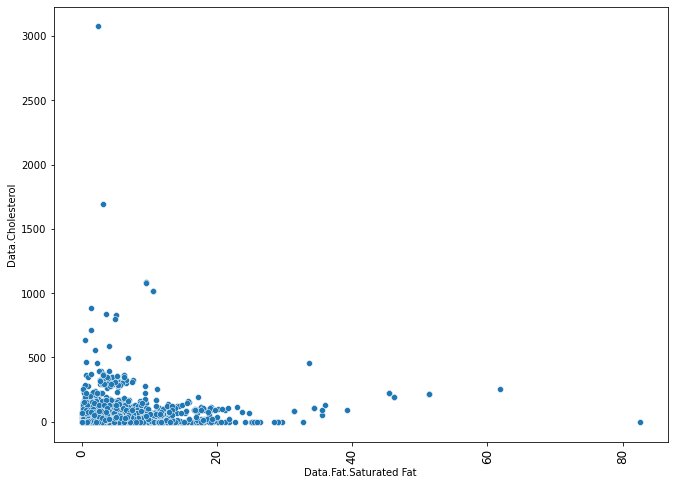

In [16]:
fig=plt.figure(figsize=(11,8))

plt.xticks(rotation=90,fontsize=12)
sns.scatterplot(data=df_fn, x="Data.Fat.Saturated Fat", y="Data.Cholesterol")